In [2]:
# Dependencies
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                   consumer_secret,
                   access_token,
                   access_token_secret)
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [11]:
# Target Search Terms
target_users = ("@CNN", "@nytimes", "@BBC", "@CBSNews", "@FoxNews")

results_list = []
tweet_text_df = []
counter = 0

for user in target_users:
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    for x in range(5):
        public_tweets = api.user_timeline(user, count = 20, page=x)
        
        for tweet in public_tweets:
            counter = counter + 1
            results = analyzer.polarity_scores(tweet['text'])
            compound = results["compound"]
            pos = results["pos"]
            neg = results["neg"]                              
            neu = results["neu"]
            text = tweet['text']
                        
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

            
            tweet_list = {"Username": user,
                "Tweet Text": text,
                "Compound": (compound),
                "Positive": (pos),
                "Negative": (neg),
                "Neutral Score": (neu),
                "Tweet Number": (counter)}
            tweet_text_df.append(tweet_list)
    counter = 0
    user_results = {"Username": user,
                "Compound Score": np.mean(compound_list),
                "Positive Score": np.mean(positive_list),
                "Negative Score": np.mean(negative_list),
                "Neutral Score": np.mean(neutral_list),
                "Tweet Count": len(compound_list)}
    
    
    results_list.append(user_results)
    
    
    
    print(f"User: {user}")
    print(f"Compound: {np.mean(compound_list):.3f}")
    print(f"Positive: {np.mean(positive_list):.3f}")
    print(f"Negative: {np.mean(negative_list):.3f}")
    print(f"Neutral: {np.mean(neutral_list):.3f}")

User: @CNN
Compound: -0.154
Positive: 0.045
Negative: 0.107
Neutral: 0.848
User: @nytimes
Compound: -0.067
Positive: 0.055
Negative: 0.088
Neutral: 0.857
User: @BBC
Compound: 0.043
Positive: 0.099
Negative: 0.074
Neutral: 0.827
User: @CBSNews
Compound: -0.159
Positive: 0.055
Negative: 0.125
Neutral: 0.821
User: @FoxNews
Compound: -0.039
Positive: 0.051
Negative: 0.065
Neutral: 0.883


In [13]:
tweet_df = pd.DataFrame(tweet_text_df).set_index("Username").round(3)
tweet_df.to_csv("News Sites with Tweets Included.csv", index=False)
tweet_df.head()

,Compound,Negative,Neutral Score,Positive,Tweet Number,Tweet Text
Username,,,,,,
@CNN,0.000,0.000,1.000,0.000,1,Conservative firebrand Jim Jordan is running f...
@CNN,0.000,0.000,1.000,0.000,2,A radio station in New Jersey took two midday ...
@CNN,0.452,0.000,0.871,0.129,3,This man built a floating bicycle so he could ...
@CNN,0.273,0.000,0.884,0.116,4,Former Trump administration aide Omarosa Manig...
@CNN,-0.637,0.317,0.583,0.100,5,New Zealand has passed legislation giving vict...


In [11]:
user_results_df = pd.DataFrame(results_list).set_index("Username").round(3)

user_results_df

,Compound Score,Negative Score,Neutral Score,Positive Score,Tweet Count
Username,,,,,
@CNN,-0.153,0.109,0.840,0.051,100
@nytimes,-0.016,0.067,0.870,0.063,100
@BBC,0.046,0.072,0.829,0.099,100
@CBSNews,-0.069,0.088,0.848,0.065,100
@FoxNews,-0.004,0.080,0.833,0.087,100


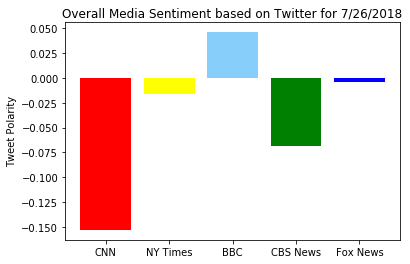

In [14]:
# The colors of each tick location of the bar graph
colors = ["red", "yellow","lightskyblue", "green","blue"]
y_vals = user_results_df["Compound Score"]
#  The bar chart itself
plt.bar(target_users, y_vals, color = colors, align = "center")
tick_locations=[user for user in target_users]
plt.xticks(tick_locations, ["CNN", "NY Times", "BBC", "CBS News", "Fox News"])
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment based on Twitter for 7/26/2018")
plt.savefig("Overall Media Sentiment.png")

NameError: name 'target_user' is not defined

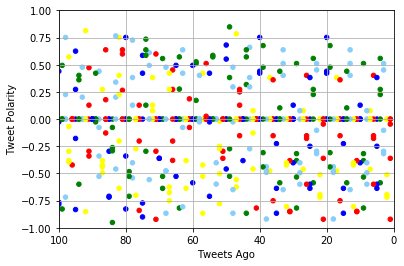

In [28]:
colors = ["red", "yellow","lightskyblue", "green","blue"]
tweet_df.plot(kind = "scatter", x = "Tweet Number",
              y = "Compound", color = colors, grid = True)
plt.ylim(-1, 1)
plt.xlim(100,0)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend (handles = target_user, loc = "best")
plt.title("Sentiment Analysis of Media Tweets -7/26/18")
plt.savefig("Sentiment Analysis.png")